In [52]:
import pandas as pd
from datetime import datetime, timedelta
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [55]:
from pandas.plotting import scatter_matrix
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [2]:
end = datetime.now()
start = end - timedelta(days=10*365)

In [7]:
stock_list = ['AAPL','GOOG','MSFT','AMZN']

In [32]:
apple = web.DataReader('AAPL','yahoo',start,end)
google = web.DataReader('GOOG','yahoo',start,end)
amazon = web.DataReader('AMZN','yahoo',start,end)
tesla = web.DataReader('TSLA','yahoo',start,end)

In [26]:
google.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-12-06,313.136292,308.961945,310.331787,310.720337,4670441.0,310.720337
2011-12-07,311.661804,307.895935,309.679260,310.531067,4531522.0,310.531067


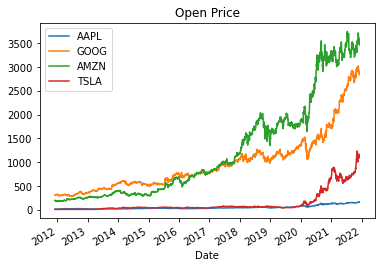

In [123]:
apple['Open'].plot(label='AAPL')
google['Open'].plot(label='GOOG')
amazon['Open'].plot(label='AMZN')
tesla['Open'].plot(label='TSLA')
plt.legend()
plt.title('Open Price');

In [34]:
apple['Total_Traded'] = apple['Open'] * apple['Volume']
google['Total_Traded'] = google['Open'] * google['Volume']
amazon['Total_Traded'] = amazon['Open'] * amazon['Volume']
tesla['Total_Traded'] = tesla['Open'] * tesla['Volume']

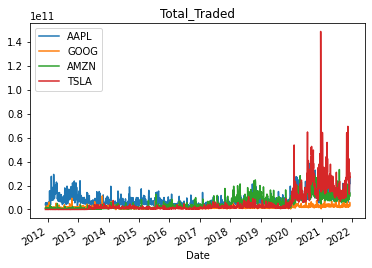

In [124]:
#Plotting Open price alone is not a good criteria, we need to know the total amount of money traded 
apple['Total_Traded'].plot(label='AAPL')
google['Total_Traded'].plot(label='GOOG')
amazon['Total_Traded'].plot(label='AMZN')
tesla['Total_Traded'].plot(label='TSLA')
plt.legend()
plt.title('Total_Traded');

### Check the Trend: Moving Average

In [39]:
#Moving Average: Gets arid of the noise while keeping the trend
apple['MovingAverage'] = apple['Open'].rolling(50).mean()
google['MovingAverage'] = google['Open'].rolling(50).mean()
amazon['MovingAverage'] = amazon['Open'].rolling(50).mean()
tesla['MovingAverage'] = tesla['Open'].rolling(50).mean()

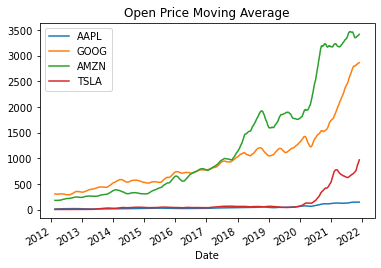

In [122]:
apple['MovingAverage'].plot(label='AAPL')
google['MovingAverage'].plot(label='GOOG')
amazon['MovingAverage'].plot(label='AMZN')
tesla['MovingAverage'].plot(label='TSLA')
plt.legend()
plt.title('Open Price Moving Average');

### Diversify your Portfolio: Correlation

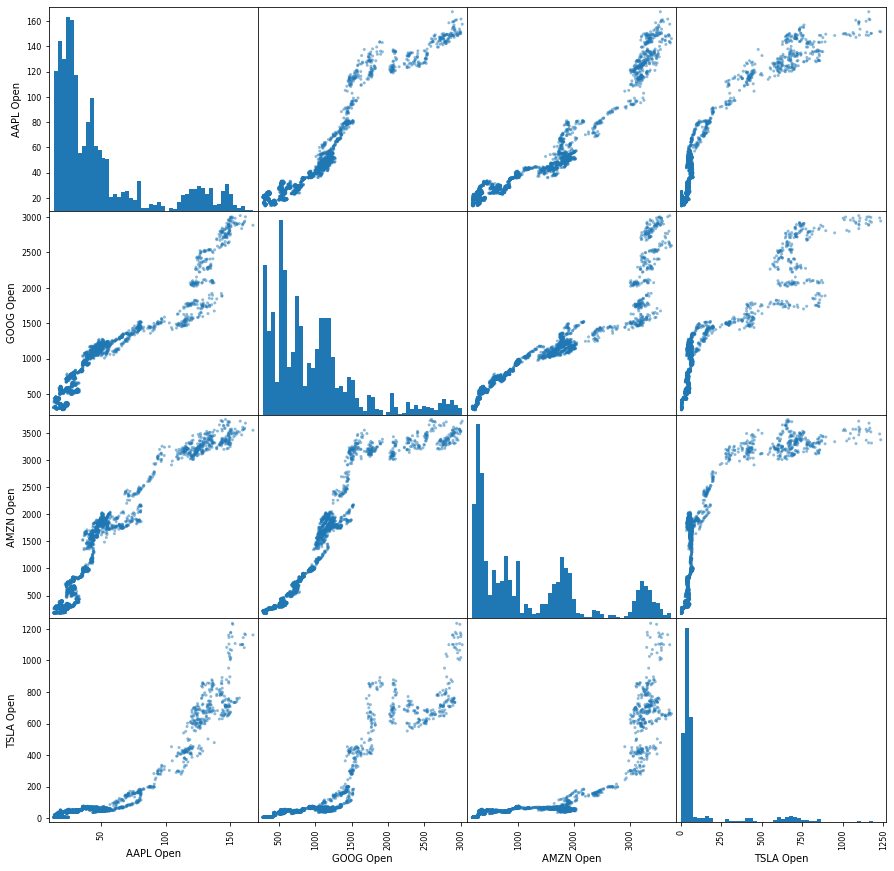

In [121]:
open_prices = pd.concat([apple['Open'],google['Open'],amazon['Open'],tesla['Open']],axis=1)
open_prices.columns = ['AAPL Open','GOOG Open','AMZN Open','TSLA Open']

scatter_matrix(open_prices,figsize=(15,15),hist_kwds={'bins':50});

In [62]:
#Japanese Candlestick plots: help us plot the open, close, high and low prices all in one chart

google_reset = google.loc['2020-3':'2020-3'].reset_index()
google_reset['date_ax'] = google_reset['Date'].apply(lambda date: date2num(date))

google_values = [tuple(vals) for vals in google_reset[['date_ax','Open','High','Low','Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

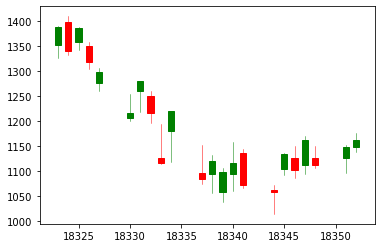

In [72]:
fig, ax = plt.subplots()
candlestick_ohlc(ax,google_values,width=0.6,colorup='g',colordown='r');

### Is the Stock Volatile: Daily Percentage Change (Daily Return)

shows how stable or volatile a stock is

rt = (Pt / Pt-1) - 1

In [82]:
apple['Daily Return'] = apple['Close'].pct_change()
google['Daily Return'] = google['Close'].pct_change()
amazon['Daily Return'] = amazon['Close'].pct_change()
tesla['Daily Return'] = tesla['Close'].pct_change()

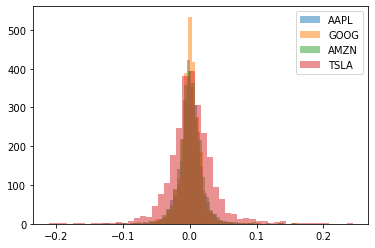

In [107]:
#The fatter the histogram is, the more volatile (higher the variance) --> Tesla is quite a volatile stock
plt.hist(apple['Daily Return'],bins=50,label='AAPL',alpha=0.5)
plt.hist(google['Daily Return'],bins=50,label='GOOG',alpha=0.5)
plt.hist(amazon['Daily Return'],bins=50,label='AMZN',alpha=0.5)
plt.hist(tesla['Daily Return'],bins=50,label='TSLA',alpha=0.5)
plt.legend();

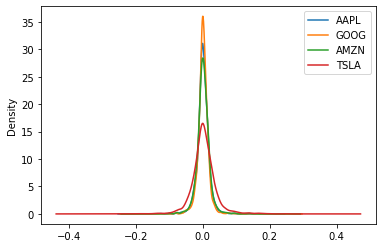

In [113]:
#Kernel density plots show a clearer image
#it's a normalized probability density function
apple['Daily Return'].plot(kind='kde',label='AAPL')
google['Daily Return'].plot(kind='kde',label='GOOG')
amazon['Daily Return'].plot(kind='kde',label='AMZN')
tesla['Daily Return'].plot(kind='kde',label='TSLA')
plt.legend();

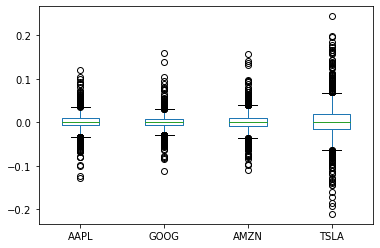

In [120]:
box_df = pd.concat([apple['Daily Return'],google['Daily Return'],amazon['Daily Return'],tesla['Daily Return']],axis=1)
box_df.columns=['AAPL','GOOG','AMZN','TSLA']
box_df.plot(kind='box');

### Cumulative Return

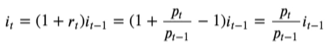

In [126]:
apple['Cum return'] = (1 + apple['Daily Return']).cumprod()
google['Cum return'] = (1 + google['Daily Return']).cumprod()
amazon['Cum return'] = (1 + amazon['Daily Return']).cumprod()
tesla['Cum return'] = (1 + tesla['Daily Return']).cumprod()

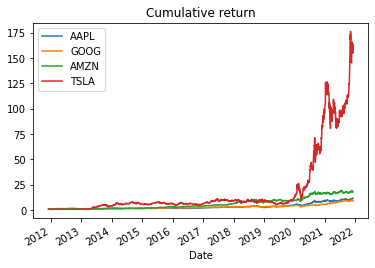

In [137]:
#If you had invested $1 in tesla in 2012, we would have $170 today
apple['Cum return'].plot(label='AAPL')
google['Cum return'].plot(label='GOOG')
amazon['Cum return'].plot(label='AMZN')
tesla['Cum return'].plot(label='TSLA')
plt.legend()
plt.title('Cumulative return');